# Лабораторная работа №7
## Решение задачи Коши
##  
## Вариант 15
### Задание:
1. Решить явным методом Адамса при $k=1$ задачу Коши:
$$y"+16y'-16y=sin(4x)e^x,\quad y(0)=1,\quad y'(0)=0, \quad 0 < x < 2,$$ построить график решения и фазовые траеткории.
2. Обеспечить работу программы с системой дифференциальных уравнений первого порядка в режиме «черного ящика» (black box).
3. Найти точное решение, сравнить найденное решение с точным.
4. Найти решение с помощью метода Рунге-Кутты кратности 4-5.
___
## Многошаговые методы. Явный метод Адамса
Точность вычислений можно увеличить, если использовать при нахождении  решения в некотором узле $x_i$ информацию о значениях функции, полученных в нескольких $(k)$ предыдущих узлах сетки интегрирования $(x_{i-1}, x_{i-2} … x_{i-k})$.

Если используются значения в $k$ предыдущих узлах, то говорят о $k$-шаговом методе интегрирования уравнения. Одним из способов построения многошаговых методов заключается в следующем. По значениям функции, вычисленным в $k$ предшествующих узлах, строится интерполяционный полином степени $(k-1)$ - $L_{k-1}$, который используется при интегрировании дифференциального уравнения. Интеграл при этом выражается через квадратурную формулу:

$$y_{i+1}=y_i+\int \limits _{{x_i}}^{{x_{i+1}}}F(x,y)dx=y_i+\int \limits _{{x_i}}^{{x_{i+1}}}L_{k-1}(x)dx=y_i+h\sum_{l=0}^k\lambda_lF(x_{i+1-l},y_{i+1-l}),$$

где $λ_l$  – квадратурные коэффициенты.

Очевидно, что при $k=1$ в качестве частного случая получается формула: $$y_{i+1}=y_i+h\frac{3f(x_i,y_i)−f(x_{i−1},y_{i−1})}{2}$$.
Для поиска для начального шага точки $y_i$ используем формулу Эйлера(одношаговый метод):$$y_{i}=y_{i-1}+hf(x_{i-1},y_{i-1})$$
### 4-х кратный метод Рунге-Кутты:
$$y_{n+1} = y_n + \frac{h}{ 6}(k_1 + 2k_2 + 2k_3 + k_4)$$ $$y0 = y0, n = 0,...,N −1, x_n ∈ω_N$$ $$k_1 ≡f(x_n,y_n)$$ $$k_2 ≡f(x_n +\frac{1}{ 2}h,y_n + \frac{1}{ 2}hk_1)$$ $$k_3 ≡f(x_n + \frac{1}{ 2}h,y_n + \frac{1}{ 2}hk_2)$$ $$k_4 ≡f(x_n + h,y_n + hk_3)$$ Алгоритмы Рунге-Кутты отлично приспособлены для практических вычислений: они не требуют вычисления дополнительных начальных данных и легко позволяют менять шаг $h$. 

### Задание 1. Решение задачи Коши заданным явным методом Адамса, к=1

In [2]:
%matplotlib inline

from numpy import sin, linspace, exp, array, dot, sqrt, cos, zeros
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.integrate import *

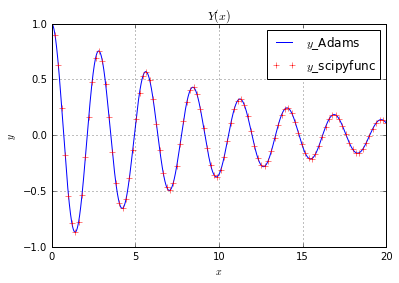

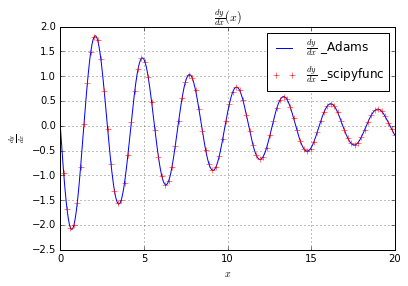

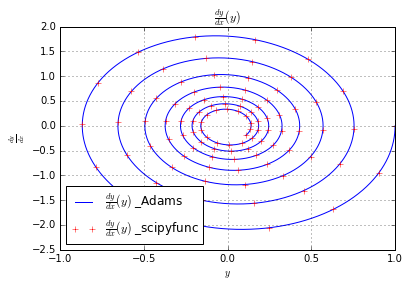

In [7]:
def F(u, t0):
    y, p=u
    dy=p
    dp=sin(4*t0)*exp(t0)-16*p+16*y
    return [dy, dp]

def F1(u, t):
    y, p=u
    dy=p
    dp =-1/5*p-5*y
    return [dy, dp]

#решение встроенной функцией(из описания функции следует, что используется в ней метод Адамса)
t = linspace(0,20,100)
result = odeint(F1,[1,0],t)
x = result[:,0]
v = result[:,1]

#решение заданным методом
e=0.01                   #точность
n=2                      #начальное разбиение отрезка
x0=0                     #начало
x1=20                     #конец
kj=10                    #
v0=[1,0]                 #граничное условие(у(0), у'(0))
w=[0,0]*n
while kj>e:
    ww0=v0
    www=[]
    h=(x1-x0)/n
    t0=x0
    ww1=ww0+dot(h,F1(v0, x0))
    www.append(ww0)
    www.append(ww1)
    while t0<x1:
        wwi=ww1+dot(dot(F1(ww1,t0+h),3)-F1(ww0, t0) ,h/2)
        ww0=ww1
        ww1=wwi
        www.append(wwi)
        t0+=h
    kj=norm(www[1]-w[1], 1)/norm(www[1],1)
    w=www
    n*=2
w=array(w).transpose()
c=w[0]; d=w[1];
tt=linspace(x0, x1, len(c))

plt.title('$Y(x)$')
plt.plot(tt, c, 'b-', label='$y$_Adams')
plt.plot(t, x, 'r+', label='$y$_scipyfunc')
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

plt.title('$\\frac{dy}{dx}(x)$')
plt.grid(True)
plt.plot(tt, d, 'b-', label='$\\frac{dy}{dx}$ _Adams' )
plt.plot(t, v,'r+', label='$ \\frac{dy}{dx}$ _scipyfunc')
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$\\frac{dy}{dx}$')
plt.show()

plt.title('$\\frac{dy}{dx}(y)$')
plt.grid(True)
plt.plot(c, d, 'b-', label='$\\frac{dy}{dx}(y)$ _Adams' )
plt.plot(x, v,'r+', label='$ \\frac{dy}{dx}(y)$ _scipyfunc')
plt.legend(loc=0)
plt.xlabel('$y$')
plt.ylabel('$\\frac{dy}{dx}$')
plt.show()


        


## Задание 2. Решение методом Рунге-Кутты кратности 4

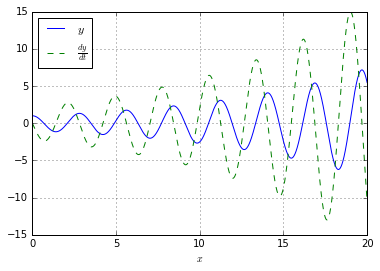

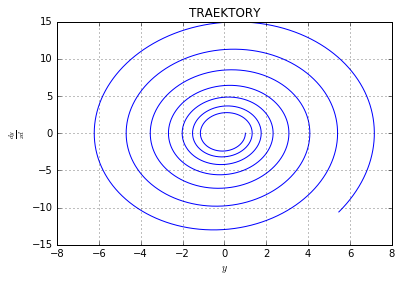

In [8]:
def increment(f, t, y, tau):
        k0 =tau*f(t,y)
        k1 =tau*f(t+tau/2.,y+k0/2.)
        k2 =tau*f(t+tau/2.,y+k1/2.)
        k3 =tau*f(t+tau, y + k2)
        return (k0 + 2.*k1 + 2.*k2 + k3) / 6.

def rungeKutta(f, t0, y0, tEnd, tau):
    t = []
    y = []
    t.append(t0)
    y.append(y0)
    while t0 < tEnd:
        tau = min(tau, tEnd - t0)
        y0 = y0 + increment(f, t0, y0, tau)
        t0 = t0 + tau
        t.append(t0)
        y.append(y0)
    return array(t), array(y)

def ff(t, y):# гармонический осциллятор с затуханием
    f = zeros((2),'float')
    f[0] = y[1]
    f[1] = 1/5*y[1]-5*y[0]
    return f

def f(t, y):# данное уравнение
    f = zeros((2),'float')
    f[0] = y[1]
    f[1] = sin(4*t)*exp(t)-16*y[1]+16*y[0]
    return f


t0 = x0
tEnd = x1
y0 = array([1., 0.])
tau = 0.00025
t, y = rungeKutta(ff, t0, y0, tEnd, tau)
for n in range(0, 2):
    r = y [:, n]
    st = '$y$'
    sg = '-'
    if n == 1:
        st = '$\\frac{d y}{dt}$'
        sg ='--'
    plt.plot(t, r, sg, label=st)
plt.legend(loc=0)
plt.xlabel('$x$')
plt.grid(True)
plt.show()

plt.grid(True)
plt.title('TRAEKTORY')
plt.xlabel('$y$')
plt.ylabel('$\\frac{dy}{xd}$')
plt.plot(y[:, 0], y[:, 1])
plt.show()

In [419]:
%matplotlib inline

from numpy import sin, linspace, exp, array, dot, sqrt, cos
from numpy.linalg import norm
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def f1(u, t0):
    y, p=u
    dy=p
    dp=sin(4*t0)*exp(t0)-16*p+16*y
    return [dy, dp]



def eiler(f, f0, t0, t1, n, e):#правая часть, начальная правая часть, Т0, Т1, начальное количество точек, точность
    vv=[0,0]*n
    kh=1000
    p=0
    while kh>e:#точность по разбиению 
        v0=f0
        v=[]
        t=t0
        h=(t1-t0)/n
        while t<=t1:#цикл по отрезку
            v1=v0+dot(f(v0, t), h)
            v0=v1
            v.append(v0)
            t+=h
        kh=norm(vv[1]-v[1], 1)/norm(v[1], 1)
        vv1=v
        vv=vv1
        n*=2
        p+=1
    return v, p

        

## Точное решение:

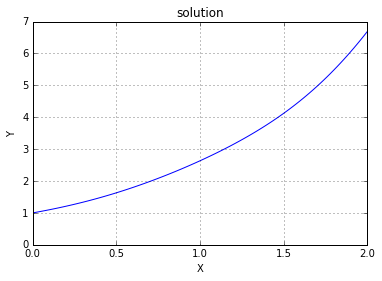

In [4]:
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('solution')
b=(1827*sqrt(5)-7308*(2+sqrt(5)))/1803/sqrt(5)
a=7308*(2+sqrt(5))/1803/sqrt(5)
x=linspace(0, 2, 100)
y=b*exp((-8+4*sqrt(5))*x)+a*exp((-8+4*sqrt(5))*x)-5*exp(x)*sin(4*x)/1803-8*exp(x)*cos(4*x)/601
plt.plot(x ,y)
plt.show()

## "Черный ящик" для решения системы уравнений 1-го порядка:

In [5]:
def f1(u, t0):
    y, p=u
    dy=p
    dp=sin(4*t0)*exp(t0)-16*p+16*y
    return [dy, dp]

def f2(u, t):
    y, p=u
    dy=p
    dp =-y
    return [dy, dp]

def blackbox(f, f0, t0, t, e):
    n=2                      
    kj=10                                    
    w=[0,0]*n
    while kj>e:
        ww0=f0
        www=[]
        h=(t-t0)/n
        tt=t0
        ww1=ww0+dot(h,f(f0, tt))
        www.append(ww0)
        www.append(ww1)
        while tt<x1:
            wwi=ww1+dot(dot(f(ww1,tt+h),3)-f(ww0, tt) ,h/2)
            ww0=ww1
            ww1=wwi
            www.append(wwi)
            tt+=h
        kj=norm(www[1]-w[1], 1)/norm(www[1],1)
        w=www
        n*=2
    w=array(w)
    y=w[:,0]
    dy=w[:,1]
    x=linspace(t0, t, len(y))
    plt.grid(True)
    plt.plot(x, y, 'g-')
    return 

None


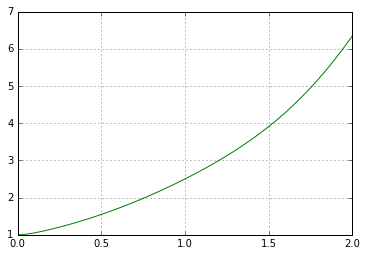

In [6]:
y0=[1,0]
t1=0
t2=2
e=0.01
print(blackbox(f1, y0, t1, t2, e))

## Сравнение точного решения с решением, полученным с помощью заданного метода
Построим разность точного решения и решения, полученного с помощью заданного метода

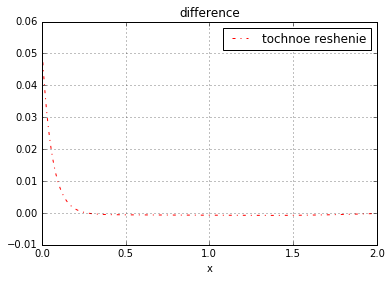

In [16]:

b=(1740*sqrt(5)-7311.21*(2+sqrt(5)))/1803/sqrt(5)
a=7308*(2+sqrt(5))/1803/sqrt(5)
x=linspace(x0, x1, len(c))
y=b*exp((-8+4*sqrt(5))*x)+a*exp((-8+4*sqrt(5))*x)-5*exp(x)*sin(4*x)/1803-8*exp(x)*cos(4*x)/601

plt.grid(True)
#plt.plot(tt, c, 'b--', label='reshenie Adams')
plt.plot(tt, c-y, 'r-.', label='tochnoe reshenie')
plt.legend(loc=0)
plt.title('difference')
plt.xlabel('x')
plt.show()

## Замечание. В некоторых местах кода показана реализация для уравнения гармонического осциллятора(для примера работы программы)